# Opening a Coffee Shop in Seattle

## Introduction

   Seattle is a Mecca for coffee. There are many options for customers and fierce competition among providers.

   This notebook will be looking to determine which neighborhood would be the optimal place to open a new cafe. It will leverage the data provided by the Foursquare API among other data sources to compare various possible neighborhoods. 

## Data Required

We will start by developing a dataset to represent the various neighborhoods of Seattle, potentially divided by zip code.

The most important data will be the locations of coffee shops alrady in operation. We want to find an area that is not overly saturated. This will help limit the areas that are considered. Starbucks locations will be of particular interest as Seattle is where this beheamoth was founded. 

Additionally, we will want to analyze other locations that are nearby. Foot traffic is incredibly important to the viability of a coffee shop. What areas have other venues that will attract people to the area?

If possible, we will want to find another data source that will give us insight into the residential versus commercial nature of various neighborhoods. Other valueable data could be statistics covering income. If we cannot find income data that is adequate, housing prices like those found in an earlier module could serve as an effective approximation. 

## Methodology

- Pull data for Seattle Zip Codes
- Clean
- Pull data for Coffee Shops
- Clean
- Investigate
- Preliminary eliminations
- Pull data for surrounding venues
- Clean
- Analyze for patterns
- Clusters
- Pull data for housing prices
- Clean


In [1]:
import pandas as pd
import numpy as np

In [2]:
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import seaborn as sns

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


### Pull data for Seattle Zip Codes

In [3]:
from pandas.io.html import read_html


url = 'http://www.discoverseattle.net/zipcodes.php'
        
table = pd.read_html(url)

In [4]:
table[0].head(30)

,0,1,2,3,4,5,6,7,8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,DiscoverSeattle.Net Seattle Forum Seattle Map...,DiscoverSeattle.Net Seattle Forum Seattle Map...,DiscoverSeattle.Net Seattle Forum Seattle Map...,NaN,Seattle Zip Codes Seattle Zip Code List Zip ...,Seattle Zip Codes Seattle Zip Code List Zip ...,Seattle Zip Codes Seattle Zip Code List Zip ...,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,DiscoverSeattle.Net,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Seattle Forum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Seattle Maps,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Seattle Restaurants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
seattle = table[0]

### Clean the Seattle data frame

In [6]:
seattle.drop([0,1,2,3,4,5,6,7,8,9,10], inplace = True)

In [7]:
seattle.drop([11,12,13,14,15,16,17,18,19,20], inplace = True)

In [8]:
seattle.drop([21,22,23,24,25,26,27], inplace = True)

In [9]:
seattle.drop(columns = [7,8], inplace = True)

In [10]:
seattle.drop(columns = [1,2,3,4], inplace = True)

In [11]:
seattle.rename(columns={0: "Zip", 5: "Latitude",6:"Longitude"}, inplace = True)

In [12]:
seattle.drop([28], inplace=True)

In [13]:
seattle.reset_index(inplace = True)

In [14]:
seattle.drop(['index'], axis = 1, inplace = True)

In [15]:
seattle.dropna(inplace = True)

In [16]:
seattle = seattle.astype(float)

In [17]:
seattle

,Zip,Latitude,Longitude
0,98101.0,47.6113,-122.3334
1,98102.0,47.6360,-122.3214
2,98103.0,47.6715,-122.3413
3,98104.0,47.6025,-122.3264
4,98105.0,47.6640,-122.2923
5,98106.0,47.5362,-122.3515
6,98107.0,47.6704,-122.3822
7,98108.0,47.5363,-122.3099
8,98109.0,47.6276,-122.3464
9,98110.0,47.6497,-122.5329


In [18]:
# create map of Seattle using latitude and longitude values
map_seattle = folium.Map(location=[47.608, -122.335167], zoom_start=9)
map_seattle

In [19]:
# add markers to map
for lat, lng, code in zip(seattle['Latitude'], seattle['Longitude'], seattle['Zip']):
    label = '{}'.format(code)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

### Pulling data on existing coffee shops

In [20]:
CLIENT_ID = 'KCL0VVBWHYFMARTEMGXGZZ1OJQ3BTYRBOOCHCLRS1IEWCU5T' # your Foursquare ID
CLIENT_SECRET = 'JSYL5RWRCA32C3WK2RK3DHRHF3XZMEZPMU1J1CTOW1H2DOQF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KCL0VVBWHYFMARTEMGXGZZ1OJQ3BTYRBOOCHCLRS1IEWCU5T
CLIENT_SECRET:JSYL5RWRCA32C3WK2RK3DHRHF3XZMEZPMU1J1CTOW1H2DOQF


In [21]:

neighborhood_latitude = seattle.loc[2, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = seattle.loc[2, 'Longitude'] # neighborhood longitude value

zip_code = seattle.loc[2, 'Zip'] # neighborhood zip code

print('Latitude and longitude values of {} are {}, {}.'.format(zip_code, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of 98103.0 are 47.6715, -122.3413.


In [22]:
LIMIT = 200 # limit of number of venues returned by Foursquare API

radius = 5000 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query=coffee'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/search?&client_id=KCL0VVBWHYFMARTEMGXGZZ1OJQ3BTYRBOOCHCLRS1IEWCU5T&client_secret=JSYL5RWRCA32C3WK2RK3DHRHF3XZMEZPMU1J1CTOW1H2DOQF&v=20180605&ll=47.6715,-122.3413&radius=5000&limit=200&query=coffee'

In [23]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5dd2929a7828ae00285663c1'},
 'response': {'venues': [{'id': '41b3a100f964a520681e1fe3',
    'name': 'Zoka Coffee Roaster & Tea Company',
    'location': {'address': '2200 N 56th St',
     'crossStreet': 'at Keystone Pl N',
     'lat': 47.668797520381034,
     'lng': -122.3328391114969,
     'labeledLatLngs': [{'label': 'display',
       'lat': 47.668797520381034,
       'lng': -122.3328391114969}],
     'distance': 701,
     'postalCode': '98103',
     'cc': 'US',
     'city': 'Seattle',
     'state': 'WA',
     'country': 'United States',
     'formattedAddress': ['2200 N 56th St (at Keystone Pl N)',
      'Seattle, WA 98103',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1e0931735',
      'name': 'Coffee Shop',
      'pluralName': 'Coffee Shops',
      'shortName': 'Coffee Shop',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
       'suffix': '.png'},
      'primary': True}],
    'referralI

In [24]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [25]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,...,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,hierarchy,location.neighborhood,venuePage.id
0,41b3a100f964a520681e1fe3,Zoka Coffee Roaster & Tea Company,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1574081182,False,2200 N 56th St,at Keystone Pl N,47.668798,-122.332839,"[{'label': 'display', 'lat': 47.66879752038103...",...,"[2200 N 56th St (at Keystone Pl N), Seattle, W...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4aa8a0bcf964a520aa5120e3,Peet's Coffee & Tea,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1574081182,False,"6850 E. Green Lake Way North,",NaN,47.678280,-122.327258,"[{'label': 'display', 'lat': 47.67828, 'lng': ...",...,"[6850 E. Green Lake Way North,, Seattle, WA 98...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4885fc0cf964a52041511fe3,Fuel Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1574081182,False,1705 N 45th St,NaN,47.661362,-122.336906,"[{'label': 'display', 'lat': 47.66136226083341...",...,"[1705 N 45th St, Seattle, WA 98103, United Sta...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,49f22b4bf964a520056a1fe3,Herkimer Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1574081182,False,5611 University Way NE,56th St.,47.669875,-122.313159,"[{'label': 'display', 'lat': 47.6698751276128,...",...,"[5611 University Way NE (56th St.), Seattle, W...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,43c02439f964a5202e2d1fe3,Fremont Coffee Company,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1574081182,False,459 N 36th St,btwn Dayton Ave N and Francis Ave N,47.651892,-122.353101,"[{'label': 'display', 'lat': 47.65189155782777...",...,[459 N 36th St (btwn Dayton Ave N and Francis ...,757609,https://www.grubhub.com/restaurant/fremont-exp...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN,NaN


In [26]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
coffeeframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
coffeeframe_filtered['categories'] = coffeeframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
coffeeframe_filtered.columns = [column.split('.')[-1] for column in coffeeframe_filtered.columns]

coffeeframe_filtered

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Zoka Coffee Roaster & Tea Company,Coffee Shop,2200 N 56th St,at Keystone Pl N,47.668798,-122.332839,"[{'label': 'display', 'lat': 47.66879752038103...",701,98103,US,Seattle,WA,United States,"[2200 N 56th St (at Keystone Pl N), Seattle, W...",NaN,41b3a100f964a520681e1fe3
1,Peet's Coffee & Tea,Coffee Shop,"6850 E. Green Lake Way North,",NaN,47.678280,-122.327258,"[{'label': 'display', 'lat': 47.67828, 'lng': ...",1295,98115,US,Seattle,WA,United States,"[6850 E. Green Lake Way North,, Seattle, WA 98...",NaN,4aa8a0bcf964a520aa5120e3
2,Fuel Coffee,Coffee Shop,1705 N 45th St,NaN,47.661362,-122.336906,"[{'label': 'display', 'lat': 47.66136226083341...",1175,98103,US,Seattle,WA,United States,"[1705 N 45th St, Seattle, WA 98103, United Sta...",NaN,4885fc0cf964a52041511fe3
3,Herkimer Coffee,Coffee Shop,5611 University Way NE,56th St.,47.669875,-122.313159,"[{'label': 'display', 'lat': 47.6698751276128,...",2117,98105,US,Seattle,WA,United States,"[5611 University Way NE (56th St.), Seattle, W...",NaN,49f22b4bf964a520056a1fe3
4,Fremont Coffee Company,Coffee Shop,459 N 36th St,btwn Dayton Ave N and Francis Ave N,47.651892,-122.353101,"[{'label': 'display', 'lat': 47.65189155782777...",2355,98103,US,Seattle,WA,United States,[459 N 36th St (btwn Dayton Ave N and Francis ...,NaN,43c02439f964a5202e2d1fe3
5,Anchored Ship Coffee Bar,Coffee Shop,5306 Ballard Ave NW,btwn Vernon Pl & N 22nd Ave,47.666625,-122.383469,"[{'label': 'display', 'lat': 47.66662542853705...",3207,98107,US,Seattle,WA,United States,[5306 Ballard Ave NW (btwn Vernon Pl & N 22nd ...,NaN,4a13ad15f964a520fb771fe3
6,Google Seattle - Junction Coffee Shop,Coffee Shop,NaN,NaN,47.649209,-122.350462,"[{'label': 'display', 'lat': 47.64920881222554...",2574,NaN,US,Seattle,WA,United States,"[Seattle, WA, United States]",Fremont,5358023f498e1f43b1af86a1
7,Conduit Coffee,Coffee Shop,NaN,NaN,47.649889,-122.350962,"[{'label': 'display', 'lat': 47.64988916263979...",2512,98103,US,Seattle,WA,United States,"[Seattle, WA 98103, United States]",NaN,505f5f7ee4b066ef681bb417
8,Coffee Shop,Coffee Shop,10200 1st Ave NE,Northgate Transit Center,47.701933,-122.327229,"[{'label': 'display', 'lat': 47.70193328302618...",3548,98125,US,Seattle,WA,United States,"[10200 1st Ave NE (Northgate Transit Center), ...",NaN,4d2dd1fcfeaaa1cdc8f1eb90
9,Reboot Coffee Lab,Café,NaN,NaN,47.648721,-122.350534,"[{'label': 'display', 'lat': 47.64872067468801...",2628,NaN,US,Seattle,WA,United States,"[Seattle, WA, United States]",Fremont,558dafc0498ea71038c71af5


In [27]:
coffeeframe_filtered.drop([ 'labeledLatLngs','distance','cc','city','state','country','formattedAddress'],axis=1, inplace= True)

In [28]:
coffeeframe_filtered

,name,categories,address,crossStreet,lat,lng,postalCode,neighborhood,id
0,Zoka Coffee Roaster & Tea Company,Coffee Shop,2200 N 56th St,at Keystone Pl N,47.668798,-122.332839,98103,NaN,41b3a100f964a520681e1fe3
1,Peet's Coffee & Tea,Coffee Shop,"6850 E. Green Lake Way North,",NaN,47.678280,-122.327258,98115,NaN,4aa8a0bcf964a520aa5120e3
2,Fuel Coffee,Coffee Shop,1705 N 45th St,NaN,47.661362,-122.336906,98103,NaN,4885fc0cf964a52041511fe3
3,Herkimer Coffee,Coffee Shop,5611 University Way NE,56th St.,47.669875,-122.313159,98105,NaN,49f22b4bf964a520056a1fe3
4,Fremont Coffee Company,Coffee Shop,459 N 36th St,btwn Dayton Ave N and Francis Ave N,47.651892,-122.353101,98103,NaN,43c02439f964a5202e2d1fe3
5,Anchored Ship Coffee Bar,Coffee Shop,5306 Ballard Ave NW,btwn Vernon Pl & N 22nd Ave,47.666625,-122.383469,98107,NaN,4a13ad15f964a520fb771fe3
6,Google Seattle - Junction Coffee Shop,Coffee Shop,NaN,NaN,47.649209,-122.350462,NaN,Fremont,5358023f498e1f43b1af86a1
7,Conduit Coffee,Coffee Shop,NaN,NaN,47.649889,-122.350962,98103,NaN,505f5f7ee4b066ef681bb417
8,Coffee Shop,Coffee Shop,10200 1st Ave NE,Northgate Transit Center,47.701933,-122.327229,98125,NaN,4d2dd1fcfeaaa1cdc8f1eb90
9,Reboot Coffee Lab,Café,NaN,NaN,47.648721,-122.350534,NaN,Fremont,558dafc0498ea71038c71af5


In [29]:
# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(coffeeframe_filtered.lat, coffeeframe_filtered.lng, coffeeframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(map_seattle)

# display map
map_seattle

In [30]:
def getNearbyCoffee(names, latitudes, longitudes, radius=5000):
    
    venues = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query=coffee'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()
        #print(results)
        
        
        # Check to make sure there isn't an empty response
        if results['response']['venues'] != []:

            # assign relevant part of JSON to venues
            venues = venues + results['response']['venues']
            
            
        
        

    
    return(venues)

In [31]:
coffee_list = getNearbyCoffee(names=seattle['Zip'],
                                   latitudes=seattle['Latitude'],
                                   longitudes=seattle['Longitude']
                                  )

print('done')

98101.0
98102.0
98103.0
98104.0
98105.0
98106.0
98107.0
98108.0
98109.0
98110.0
98111.0
98112.0
98114.0
98115.0
98116.0
98117.0
98118.0
98119.0
98121.0
98122.0
98124.0
98125.0
98126.0
98129.0
98131.0
98132.0
98133.0
98134.0
98136.0
98138.0
98144.0
98145.0
98146.0
98148.0
98151.0
98154.0
98155.0
98158.0
98160.0
98161.0
98164.0
98166.0
98168.0
98170.0
98171.0
98174.0
98177.0
98178.0
98181.0
98184.0
98185.0
98188.0
98190.0
98191.0
98195.0
98198.0
98199.0
done


In [32]:
seattle_coffee = json_normalize(coffee_list)
seattle_coffee.head()

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,...,location.formattedAddress,hierarchy,venuePage.id,location.neighborhood,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name
0,57e95a82498e0a3995a43e90,Anchorhead Coffee Co,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1574081184,False,1600 7th Ave Ste 105,Olive Way,47.613450,-122.334702,"[{'label': 'display', 'lat': 47.61344995548114...",...,"[1600 7th Ave Ste 105 (Olive Way), Seattle, WA...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,52251f9511d2b2f238901956,Storyville Coffee Company,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1574081184,False,94 Pike St #34,1st Ave (Pike Place Market),47.608968,-122.340697,"[{'label': 'display', 'lat': 47.60896841228568...",...,"[94 Pike St #34 (1st Ave (Pike Place Market)),...",[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,569d5c6c498e4ff52aa8b724,Olympia Coffee Roasters,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1574081184,False,2021 7th Ave,NaN,47.615100,-122.338344,"[{'label': 'display', 'lat': 47.61510038990799...",...,"[2021 7th Ave, Seattle, WA 98121, United States]",[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,475ebc58f964a520d94c1fe3,Kaladi Brothers Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1574081184,False,517 E Pike St,at Belmont Ave.,47.614152,-122.324565,"[{'label': 'display', 'lat': 47.61415161351147...",...,"[517 E Pike St (at Belmont Ave.), Seattle, WA ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5802b14d38fa7d4a74864fe9,Urban Coffee House,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1574081184,False,1900 4th Ave,NaN,47.612460,-122.338748,"[{'label': 'display', 'lat': 47.61246003668287...",...,"[1900 4th Ave, Seattle, WA 98101, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
seattle_coffee.shape

(2774, 26)

### Clean the coffee data frame

In [34]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in seattle_coffee.columns if col.startswith('location.')] + ['id']
seattle_coffeeframe_filtered = seattle_coffee.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
seattle_coffeeframe_filtered['categories'] = seattle_coffeeframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
seattle_coffeeframe_filtered.columns = [column.split('.')[-1] for column in seattle_coffeeframe_filtered.columns]

seattle_coffeeframe_filtered

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Anchorhead Coffee Co,Coffee Shop,1600 7th Ave Ste 105,Olive Way,47.613450,-122.334702,"[{'label': 'display', 'lat': 47.61344995548114...",258,98101,US,Seattle,WA,United States,"[1600 7th Ave Ste 105 (Olive Way), Seattle, WA...",NaN,57e95a82498e0a3995a43e90
1,Storyville Coffee Company,Coffee Shop,94 Pike St #34,1st Ave (Pike Place Market),47.608968,-122.340697,"[{'label': 'display', 'lat': 47.60896841228568...",606,98101,US,Seattle,WA,United States,"[94 Pike St #34 (1st Ave (Pike Place Market)),...",NaN,52251f9511d2b2f238901956
2,Olympia Coffee Roasters,Coffee Shop,2021 7th Ave,NaN,47.615100,-122.338344,"[{'label': 'display', 'lat': 47.61510038990799...",562,98121,US,Seattle,WA,United States,"[2021 7th Ave, Seattle, WA 98121, United States]",NaN,569d5c6c498e4ff52aa8b724
3,Kaladi Brothers Coffee,Coffee Shop,517 E Pike St,at Belmont Ave.,47.614152,-122.324565,"[{'label': 'display', 'lat': 47.61415161351147...",735,98122,US,Seattle,WA,United States,"[517 E Pike St (at Belmont Ave.), Seattle, WA ...",NaN,475ebc58f964a520d94c1fe3
4,Urban Coffee House,Coffee Shop,1900 4th Ave,NaN,47.612460,-122.338748,"[{'label': 'display', 'lat': 47.61246003668287...",421,98101,US,Seattle,WA,United States,"[1900 4th Ave, Seattle, WA 98101, United States]",NaN,5802b14d38fa7d4a74864fe9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2769,Bauhaus Books & Coffee,Coffee Shop,2001 NW Market St,N 20th Ave,47.668536,-122.382294,"[{'label': 'display', 'lat': 47.66853560007080...",2720,98107,US,Seattle,WA,United States,"[2001 NW Market St (N 20th Ave), Seattle, WA 9...",NaN,5261bda811d2b9ed241653fa
2770,Street Bean Coffee Roasters,Coffee Shop,910 Stewart St,NaN,47.615925,-122.334204,"[{'label': 'display', 'lat': 47.615925, 'lng':...",6040,98101,US,Seattle,WA,United States,"[910 Stewart St, Seattle, WA 98101, United Sta...",NaN,5dc05ae854db0400086a9a70
2771,True North Coffee,Coffee Shop,1406 NW 53rd St,NaN,47.667382,-122.374177,"[{'label': 'display', 'lat': 47.66738153785242...",2965,98107,US,Seattle,WA,United States,"[1406 NW 53rd St, Seattle, WA 98107, United St...",NaN,4ecc81a56d86908aa830c91a
2772,Tripod Coffee,Coffee Shop,NaN,NaN,47.667761,-122.379023,"[{'label': 'display', 'lat': 47.667761, 'lng':...",2777,NaN,US,Seattle,WA,United States,"[Seattle, WA, United States]",NaN,5638ec89cd102b4593c19e80


In [35]:
seattle_coffeeframe_filtered.drop([ 'labeledLatLngs','distance','cc','city','state','country','neighborhood','formattedAddress'],axis=1, inplace= True)

In [36]:
seattle_coffeeframe_filtered

,name,categories,address,crossStreet,lat,lng,postalCode,id
0,Anchorhead Coffee Co,Coffee Shop,1600 7th Ave Ste 105,Olive Way,47.613450,-122.334702,98101,57e95a82498e0a3995a43e90
1,Storyville Coffee Company,Coffee Shop,94 Pike St #34,1st Ave (Pike Place Market),47.608968,-122.340697,98101,52251f9511d2b2f238901956
2,Olympia Coffee Roasters,Coffee Shop,2021 7th Ave,NaN,47.615100,-122.338344,98121,569d5c6c498e4ff52aa8b724
3,Kaladi Brothers Coffee,Coffee Shop,517 E Pike St,at Belmont Ave.,47.614152,-122.324565,98122,475ebc58f964a520d94c1fe3
4,Urban Coffee House,Coffee Shop,1900 4th Ave,NaN,47.612460,-122.338748,98101,5802b14d38fa7d4a74864fe9
...,...,...,...,...,...,...,...,...
2769,Bauhaus Books & Coffee,Coffee Shop,2001 NW Market St,N 20th Ave,47.668536,-122.382294,98107,5261bda811d2b9ed241653fa
2770,Street Bean Coffee Roasters,Coffee Shop,910 Stewart St,NaN,47.615925,-122.334204,98101,5dc05ae854db0400086a9a70
2771,True North Coffee,Coffee Shop,1406 NW 53rd St,NaN,47.667382,-122.374177,98107,4ecc81a56d86908aa830c91a
2772,Tripod Coffee,Coffee Shop,NaN,NaN,47.667761,-122.379023,NaN,5638ec89cd102b4593c19e80


In [37]:
seattle_coffeeframe_filtered.drop_duplicates(inplace=True)

In [38]:
seattle_coffeeframe_filtered.reset_index(inplace=True)

In [39]:
seattle_coffeeframe_filtered.drop(['index'], axis = 1, inplace= True)

In [40]:
seattle_coffeeframe_filtered

,name,categories,address,crossStreet,lat,lng,postalCode,id
0,Anchorhead Coffee Co,Coffee Shop,1600 7th Ave Ste 105,Olive Way,47.613450,-122.334702,98101,57e95a82498e0a3995a43e90
1,Storyville Coffee Company,Coffee Shop,94 Pike St #34,1st Ave (Pike Place Market),47.608968,-122.340697,98101,52251f9511d2b2f238901956
2,Olympia Coffee Roasters,Coffee Shop,2021 7th Ave,NaN,47.615100,-122.338344,98121,569d5c6c498e4ff52aa8b724
3,Kaladi Brothers Coffee,Coffee Shop,517 E Pike St,at Belmont Ave.,47.614152,-122.324565,98122,475ebc58f964a520d94c1fe3
4,Urban Coffee House,Coffee Shop,1900 4th Ave,NaN,47.612460,-122.338748,98101,5802b14d38fa7d4a74864fe9
...,...,...,...,...,...,...,...,...
452,Starbucks,Coffee Shop,25250 Pacific Highway South,NaN,47.374234,-122.298158,98032,4fc9457ed4f24895b4467b55
453,Starbucks,Coffee Shop,210 Washington Ave S,NaN,47.380224,-122.246425,98032,4cbce8d64c60a0930e1754ca
454,Urban Timber,Coffee Shop,20038 68th Ave S,NaN,47.422252,-122.249167,98032,4eee9761e300215594d7081f
455,Starbucks,Coffee Shop,425 W Meeker St,NaN,47.381650,-122.237255,98032,4ae09afaf964a520d88021e3


In [41]:
seattle_coffeeframe_filtered.categories.value_counts()

Coffee Shop                        338
Café                                33
Food                                20
Cupcake Shop                         4
Donut Shop                           4
Ethiopian Restaurant                 3
Miscellaneous Shop                   3
Conference Room                      3
Corporate Coffee Shop                2
Bakery                               2
Restaurant                           2
Office                               2
Food Truck                           2
Tea Room                             2
Snack Place                          2
Bar                                  2
American Restaurant                  1
Molecular Gastronomy Restaurant      1
African Restaurant                   1
Car Wash                             1
Tech Startup                         1
Historic Site                        1
Distribution Center                  1
Mediterranean Restaurant             1
Poke Place                           1
Building                 

In [42]:
seattle_cf=seattle_coffeeframe_filtered

#### In this section I checked the rows based on categories that appeared outside the scope of the search

Some remained in the data set even though the category would lead one to think it might not belong (for instance the pizza place has coffee in the name)

In [43]:
seattle_cf.loc[seattle_cf['categories'] != 'Coffee Shop'  ]

,name,categories,address,crossStreet,lat,lng,postalCode,id
20,Cupcake Royale and Vérité Coffee,Cupcake Shop,1111 E Pike St,btwn 11th & 12th Ave,47.614013,-122.317606,98122,4a63a829f964a52087c51fe3
26,Westman’s Bagel and Coffee,Bagel Shop,1509 E Madidon St,15th St,47.614769,-122.312322,98122,5a621e5866611622b6fe4f90
27,Victrola Coffee Roasters (Amazon Campus),Café,500 Boren Ave N,betw Mercer & Republican,47.623860,-122.335526,98109,4c3b5693be4620a17b310c13
33,Amazon Rocco Coffee Roasting,Café,202 Westlake Ave N Fl 5,NaN,47.620052,-122.338120,NaN,5761c48d498ec4ca79a2f9ae
34,Voxx Coffee,Café,1200 6th Ave,University,47.608919,-122.332504,98101,50523792e4b0c32d8cc1a4aa
...,...,...,...,...,...,...,...,...
437,Tully's Coffee,Café,20403 68th Ave S Bldg 18-61,NaN,47.418367,-122.249938,98032,4eab2145aad27619a12a63ad
438,Mr.C's Coffee & Tea Offices,Conference Room,NaN,NaN,47.613777,-122.335252,NaN,4d6c25d9b3e4a143836def90
444,Cheap Coffee,None,1605 W Meeker St,NaN,47.381290,-122.253991,98032,4c55a19e1b46c9b6e26892d0
449,Halo Coffee House,None,204 E Smith St,NaN,47.383120,-122.231950,98032,4cbcadcb4c60a0933dbd52ca


In [44]:
seattle_cf.loc[seattle_cf['categories'] == 'Distribution Center'  ]

,name,categories,address,crossStreet,lat,lng,postalCode,id
321,Aramark - Office Coffee & Water Services,Distribution Center,1097 Andover Park E,Saxon Dr,47.444779,-122.25101,98188,576af3e9498ed252ce2b1e73


In [46]:
seattle_cf.drop([321],  inplace = True)

In [48]:
seattle_cf.loc[seattle_cf['categories'] == 'Food'  ]

,name,categories,address,crossStreet,lat,lng,postalCode,id
45,Boyds Coffee Stores,Food,1303 6th Ave,NaN,47.610147,-122.333558,98101,4f32455b19836c91c7c7255a
83,Coffee Hut,Food,3623 Leary Way NW,NaN,47.654046,-122.360089,98107,4f32190f19836c91c7b59bd8
112,Tid Coffee House,Food,304 4th Ave S,NaN,47.599194,-122.328989,98104,4f32566919836c91c7cdd819
119,Beans Co Coffee,Food,2118 NE 65th St,NaN,47.675849,-122.303915,98115,4f323dfa19836c91c7c43517
125,Black Cat Coffee,Food,4359 Roosevelt Way NE,NaN,47.660400,-122.317737,98105,4f323d2919836c91c7c3df4e
140,Bean Collection Coffee,Food,309 S Cloverdale St,NaN,47.526612,-122.330736,98108,4f3229ff19836c91c7bc78e6
144,Coffee Lavazza Distr,Food,126 S Spokane St,NaN,47.571683,-122.333453,98134,4f43f95019836ed00191802d
168,Blenders Coffee House and Boba,Food,4886 Beacon Ave S,NaN,47.559431,-122.304382,98108,4f322a6019836c91c7bc9d7d
214,Storyville Coffee Company,Food,9459 Coppertop Loop NE,NaN,47.656993,-122.547623,98110,4f328b2919836c91c7e219be
219,Gloria Jean's Coffee Bean,Food,1601 5th Ave,NaN,47.611720,-122.336530,98101,4f32764f19836c91c7da28aa


In [49]:
seattle_cf.reset_index(inplace = True)

In [50]:
seattle_cf.drop(['index'],axis = 1, inplace = True)

In [51]:
seattle_cf

,name,categories,address,crossStreet,lat,lng,postalCode,id
0,Anchorhead Coffee Co,Coffee Shop,1600 7th Ave Ste 105,Olive Way,47.613450,-122.334702,98101,57e95a82498e0a3995a43e90
1,Storyville Coffee Company,Coffee Shop,94 Pike St #34,1st Ave (Pike Place Market),47.608968,-122.340697,98101,52251f9511d2b2f238901956
2,Olympia Coffee Roasters,Coffee Shop,2021 7th Ave,NaN,47.615100,-122.338344,98121,569d5c6c498e4ff52aa8b724
3,Kaladi Brothers Coffee,Coffee Shop,517 E Pike St,at Belmont Ave.,47.614152,-122.324565,98122,475ebc58f964a520d94c1fe3
4,Urban Coffee House,Coffee Shop,1900 4th Ave,NaN,47.612460,-122.338748,98101,5802b14d38fa7d4a74864fe9
...,...,...,...,...,...,...,...,...
451,Starbucks,Coffee Shop,25250 Pacific Highway South,NaN,47.374234,-122.298158,98032,4fc9457ed4f24895b4467b55
452,Starbucks,Coffee Shop,210 Washington Ave S,NaN,47.380224,-122.246425,98032,4cbce8d64c60a0930e1754ca
453,Urban Timber,Coffee Shop,20038 68th Ave S,NaN,47.422252,-122.249167,98032,4eee9761e300215594d7081f
454,Starbucks,Coffee Shop,425 W Meeker St,NaN,47.381650,-122.237255,98032,4ae09afaf964a520d88021e3


In [52]:
seattle_cf.postalCode.value_counts()

98101    25
98105    21
98104    20
98109    18
98032    18
98133    17
98122    16
98115    16
98188    16
98158    13
98103    13
98134    12
98107    12
98117    11
98168    11
98112    10
98121    10
98125    10
98108    10
98116     9
98057     9
98118     9
98148     8
98144     8
98119     7
98155     7
98020     7
98106     6
98102     6
98126     6
98040     5
98136     5
98199     5
98110     5
98026     4
98198     3
98055     2
98177     2
98028     2
98034     2
98146     2
98178     2
98166     2
98036     2
98008     1
98004     1
98154     1
98070     1
98056     1
98043     1
Name: postalCode, dtype: int64

In [53]:
seattle_cf.dropna(subset = ['postalCode'], inplace = True)
seattle_cf

,name,categories,address,crossStreet,lat,lng,postalCode,id
0,Anchorhead Coffee Co,Coffee Shop,1600 7th Ave Ste 105,Olive Way,47.613450,-122.334702,98101,57e95a82498e0a3995a43e90
1,Storyville Coffee Company,Coffee Shop,94 Pike St #34,1st Ave (Pike Place Market),47.608968,-122.340697,98101,52251f9511d2b2f238901956
2,Olympia Coffee Roasters,Coffee Shop,2021 7th Ave,NaN,47.615100,-122.338344,98121,569d5c6c498e4ff52aa8b724
3,Kaladi Brothers Coffee,Coffee Shop,517 E Pike St,at Belmont Ave.,47.614152,-122.324565,98122,475ebc58f964a520d94c1fe3
4,Urban Coffee House,Coffee Shop,1900 4th Ave,NaN,47.612460,-122.338748,98101,5802b14d38fa7d4a74864fe9
...,...,...,...,...,...,...,...,...
451,Starbucks,Coffee Shop,25250 Pacific Highway South,NaN,47.374234,-122.298158,98032,4fc9457ed4f24895b4467b55
452,Starbucks,Coffee Shop,210 Washington Ave S,NaN,47.380224,-122.246425,98032,4cbce8d64c60a0930e1754ca
453,Urban Timber,Coffee Shop,20038 68th Ave S,NaN,47.422252,-122.249167,98032,4eee9761e300215594d7081f
454,Starbucks,Coffee Shop,425 W Meeker St,NaN,47.381650,-122.237255,98032,4ae09afaf964a520d88021e3


In [54]:
# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(seattle_cf.lat, seattle_cf.lng, seattle_cf.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=3,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(map_seattle)

# display map
map_seattle

## Exploring Coffee Data

In [55]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [56]:
ser = seattle_cf['postalCode'].astype(int)

In [111]:
s = ser.value_counts()
s

98101    25
98105    21
98104    20
98109    18
98032    18
98133    17
98122    16
98115    16
98188    16
98158    13
98103    13
98107    12
98134    12
98168    11
98117    11
98108    10
98121    10
98112    10
98125    10
98118     9
98116     9
98057     9
98144     8
98148     8
98119     7
98155     7
98020     7
98126     6
98102     6
98106     6
98040     5
98199     5
98110     5
98136     5
98026     4
98198     3
98178     2
98028     2
98177     2
98034     2
98036     2
98166     2
98055     2
98146     2
98043     1
98056     1
98154     1
98070     1
98008     1
98004     1
Name: postalCode, dtype: int64

In [58]:
seattle_cf.reset_index(inplace = True)
seattle_cf.drop(['index'],axis = 1, inplace = True)

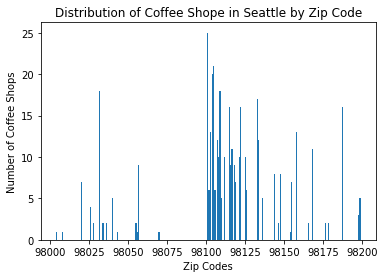

In [108]:
ser.plot(kind='hist', bins = 250)

plt.title('Distribution of Coffee Shope in Seattle by Zip Code')
plt.ylabel('Number of Coffee Shops')
plt.xlabel('Zip Codes')

plt.show()

In [60]:
seattle_culled = seattle

In [61]:
seattle_culled.drop([0,3,4,8,13,19,26,51], axis = 0, inplace = True)

In [62]:
seattle_culled.reset_index(inplace = True)
seattle_culled.drop(['index'],axis = 1, inplace = True)
seattle_culled

,Zip,Latitude,Longitude
0,98102.0,47.6360,-122.3214
1,98103.0,47.6715,-122.3413
2,98106.0,47.5362,-122.3515
3,98107.0,47.6704,-122.3822
4,98108.0,47.5363,-122.3099
5,98110.0,47.6497,-122.5329
6,98111.0,47.6122,-122.3352
7,98112.0,47.6300,-122.2943
8,98114.0,47.5799,-122.3125
9,98116.0,47.5747,-122.3954


In [63]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [64]:
seattle_venues = getNearbyVenues(names=seattle_culled['Zip'],
                                   latitudes=seattle_culled['Latitude'],
                                   longitudes=seattle_culled['Longitude']
                                  )

98102.0
98103.0
98106.0
98107.0
98108.0
98110.0
98111.0
98112.0
98114.0
98116.0
98117.0
98118.0
98119.0
98121.0
98124.0
98125.0
98126.0
98129.0
98131.0
98132.0
98134.0
98136.0
98138.0
98144.0
98145.0
98146.0
98148.0
98151.0
98154.0
98155.0
98158.0
98160.0
98161.0
98164.0
98166.0
98168.0
98170.0
98171.0
98174.0
98177.0
98178.0
98181.0
98184.0
98185.0
98190.0
98191.0
98195.0
98198.0
98199.0


In [65]:
print(seattle_venues.shape)
seattle_venues.head()

(1693, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,98102.0,47.636,-122.3214,Streissguth Gardens,47.635006,-122.320775,Garden
1,98102.0,47.636,-122.3214,E Howe Street Stairs,47.635839,-122.320619,Gym
2,98102.0,47.636,-122.3214,Grand Central Bakery,47.634491,-122.325140,Bakery
3,98102.0,47.636,-122.3214,20oz tea,47.635307,-122.325511,Bubble Tea Shop
4,98102.0,47.636,-122.3214,Serafina,47.638110,-122.325994,Italian Restaurant


In [66]:
seattle_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
98102.0,18,18,18,18,18,18
98103.0,6,6,6,6,6,6
98106.0,5,5,5,5,5,5
98107.0,100,100,100,100,100,100
98108.0,16,16,16,16,16,16
98111.0,100,100,100,100,100,100
98112.0,16,16,16,16,16,16
98114.0,15,15,15,15,15,15
98116.0,1,1,1,1,1,1


In [67]:
# one hot encoding
sea_onehot = pd.get_dummies(seattle_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sea_onehot['Neighborhood'] = seattle_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [sea_onehot.columns[-1]] + list(sea_onehot.columns[:-1])
sea_onehot = sea_onehot[fixed_columns]

sea_onehot.head()

,Yoga Studio,ATM,Accessories Store,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,...,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
sea_onehot.drop(['Coffee Shop','Café'], axis = 1, inplace = True)

In [69]:
sea_onehot.shape

(1693, 225)

In [70]:
sea_grouped = sea_onehot.groupby('Neighborhood').mean().reset_index()
sea_grouped

,Neighborhood,Yoga Studio,ATM,Accessories Store,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,...,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store
0,98102.0,0.000000,0.000000,0.00,0.000000,0.0000,0.0000,0.00,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00
1,98103.0,0.000000,0.000000,0.00,0.000000,0.0000,0.0000,0.00,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00
2,98106.0,0.000000,0.000000,0.00,0.000000,0.0000,0.0000,0.00,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00
3,98107.0,0.010000,0.000000,0.00,0.000000,0.0000,0.0000,0.00,0.000000,0.000000,...,0.00,0.010000,0.000000,0.000000,0.020000,0.00,0.00,0.000000,0.000000,0.00
4,98108.0,0.000000,0.000000,0.00,0.125000,0.0625,0.0625,0.25,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00
5,98111.0,0.010000,0.000000,0.01,0.000000,0.0000,0.0000,0.00,0.030000,0.000000,...,0.00,0.010000,0.000000,0.000000,0.000000,0.00,0.00,0.020000,0.000000,0.01
6,98112.0,0.000000,0.000000,0.00,0.000000,0.0000,0.0000,0.00,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00
7,98114.0,0.066667,0.000000,0.00,0.000000,0.0000,0.0000,0.00,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00
8,98116.0,0.000000,0.000000,0.00,0.000000,0.0000,0.0000,0.00,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00
9,98117.0,0.000000,0.000000,0.00,0.000000,0.0000,0.0000,0.00,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00


In [71]:
num_top_venues = 5

for hood in sea_grouped['Neighborhood']:
    print(hood)
    temp = sea_grouped[sea_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

98102.0
                venue  freq
0            Bus Stop  0.11
1  Italian Restaurant  0.11
2                 Spa  0.06
3   Martial Arts Dojo  0.06
4              Bakery  0.06


98103.0
          venue  freq
0    Skate Park  0.17
1          Park  0.17
2  Tennis Court  0.17
3       Dog Run  0.17
4       Theater  0.17


98106.0
               venue  freq
0  Convenience Store   0.4
1              Trail   0.2
2               Park   0.2
3            Theater   0.2
4    Other Nightlife   0.0


98107.0
                venue  freq
0                 Bar  0.05
1    Sushi Restaurant  0.05
2  Mexican Restaurant  0.05
3        Cocktail Bar  0.04
4      Ice Cream Shop  0.04


98108.0
                 venue  freq
0     Airport Terminal  0.25
1              Airport  0.12
2  Rental Car Location  0.06
3        Moving Target  0.06
4          Bus Station  0.06


98111.0
                     venue  freq
0                    Hotel  0.13
1           Clothing Store  0.04
2  New American Restaurant  0.04
3     

In [72]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [73]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = sea_grouped['Neighborhood']

for ind in np.arange(sea_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sea_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,98102.0,Bus Stop,Italian Restaurant,Garden,Thai Restaurant,Bubble Tea Shop,Cemetery,Dog Run,Restaurant,Bakery,Boat or Ferry
1,98103.0,Skate Park,Park,Golf Course,Tennis Court,Theater,Dog Run,Women's Store,Doctor's Office,Farmers Market,Falafel Restaurant
2,98106.0,Convenience Store,Park,Trail,Theater,Women's Store,Doctor's Office,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Eye Doctor
3,98107.0,Sushi Restaurant,Bar,Mexican Restaurant,Cocktail Bar,Ice Cream Shop,Burger Joint,Bakery,Thai Restaurant,Sandwich Place,New American Restaurant
4,98108.0,Airport Terminal,Airport,Office,Rental Car Location,Airport Lounge,Airport Service,Electronics Store,Gym,Bus Station,Moving Target


In [74]:
# set number of clusters
kclusters = 10

seattle_grouped_clustering = sea_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(seattle_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 7, 0, 0, 0, 0, 0, 3, 0], dtype=int32)

In [75]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)




In [76]:
print(neighborhoods_venues_sorted['Cluster Labels'])

0     0
1     0
2     7
3     0
4     0
5     0
6     0
7     0
8     3
9     0
10    0
11    0
12    0
13    0
14    0
15    6
16    0
17    8
18    8
19    0
20    6
21    0
22    0
23    0
24    0
25    9
26    8
27    0
28    4
29    1
30    0
31    0
32    0
33    2
34    5
35    0
36    0
37    0
38    4
39    0
40    0
41    0
42    0
43    6
44    0
45    0
46    0
47    0
Name: Cluster Labels, dtype: int32


In [77]:
sea_merged = seattle_culled

sea_merged

,Zip,Latitude,Longitude
0,98102.0,47.6360,-122.3214
1,98103.0,47.6715,-122.3413
2,98106.0,47.5362,-122.3515
3,98107.0,47.6704,-122.3822
4,98108.0,47.5363,-122.3099
5,98110.0,47.6497,-122.5329
6,98111.0,47.6122,-122.3352
7,98112.0,47.6300,-122.2943
8,98114.0,47.5799,-122.3125
9,98116.0,47.5747,-122.3954


In [78]:
neighborhoods_venues_sorted

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,98102.0,Bus Stop,Italian Restaurant,Garden,Thai Restaurant,Bubble Tea Shop,Cemetery,Dog Run,Restaurant,Bakery,Boat or Ferry
1,0,98103.0,Skate Park,Park,Golf Course,Tennis Court,Theater,Dog Run,Women's Store,Doctor's Office,Farmers Market,Falafel Restaurant
2,7,98106.0,Convenience Store,Park,Trail,Theater,Women's Store,Doctor's Office,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Eye Doctor
3,0,98107.0,Sushi Restaurant,Bar,Mexican Restaurant,Cocktail Bar,Ice Cream Shop,Burger Joint,Bakery,Thai Restaurant,Sandwich Place,New American Restaurant
4,0,98108.0,Airport Terminal,Airport,Office,Rental Car Location,Airport Lounge,Airport Service,Electronics Store,Gym,Bus Station,Moving Target
5,0,98111.0,Hotel,New American Restaurant,Clothing Store,Juice Bar,Spa,Steakhouse,American Restaurant,Theater,Pizza Place,Italian Restaurant
6,0,98112.0,Garden,Candy Store,Gas Station,Soccer Field,Dry Cleaner,Sushi Restaurant,Scenic Lookout,Tea Room,Bakery,Spa
7,0,98114.0,Grocery Store,Yoga Studio,Gas Station,Pub,Scenic Lookout,Brewery,Mexican Restaurant,Mediterranean Restaurant,Taco Place,Bakery
8,3,98116.0,Scenic Lookout,Women's Store,Doctor's Office,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Eye Doctor,Electronics Store,Dumpling Restaurant
9,0,98117.0,Pizza Place,Restaurant,Rental Car Location,Soccer Field,Middle Eastern Restaurant,Shipping Store,Bus Line,Bus Stop,Mobile Phone Shop,Fish Market


In [79]:
neighborhoods_venues_sorted.rename(columns = {"Neighborhood":"Zip"}, inplace = True)
neighborhoods_venues_sorted

,Cluster Labels,Zip,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,98102.0,Bus Stop,Italian Restaurant,Garden,Thai Restaurant,Bubble Tea Shop,Cemetery,Dog Run,Restaurant,Bakery,Boat or Ferry
1,0,98103.0,Skate Park,Park,Golf Course,Tennis Court,Theater,Dog Run,Women's Store,Doctor's Office,Farmers Market,Falafel Restaurant
2,7,98106.0,Convenience Store,Park,Trail,Theater,Women's Store,Doctor's Office,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Eye Doctor
3,0,98107.0,Sushi Restaurant,Bar,Mexican Restaurant,Cocktail Bar,Ice Cream Shop,Burger Joint,Bakery,Thai Restaurant,Sandwich Place,New American Restaurant
4,0,98108.0,Airport Terminal,Airport,Office,Rental Car Location,Airport Lounge,Airport Service,Electronics Store,Gym,Bus Station,Moving Target
5,0,98111.0,Hotel,New American Restaurant,Clothing Store,Juice Bar,Spa,Steakhouse,American Restaurant,Theater,Pizza Place,Italian Restaurant
6,0,98112.0,Garden,Candy Store,Gas Station,Soccer Field,Dry Cleaner,Sushi Restaurant,Scenic Lookout,Tea Room,Bakery,Spa
7,0,98114.0,Grocery Store,Yoga Studio,Gas Station,Pub,Scenic Lookout,Brewery,Mexican Restaurant,Mediterranean Restaurant,Taco Place,Bakery
8,3,98116.0,Scenic Lookout,Women's Store,Doctor's Office,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Eye Doctor,Electronics Store,Dumpling Restaurant
9,0,98117.0,Pizza Place,Restaurant,Rental Car Location,Soccer Field,Middle Eastern Restaurant,Shipping Store,Bus Line,Bus Stop,Mobile Phone Shop,Fish Market


In [80]:
sea_merged = sea_merged.join(neighborhoods_venues_sorted.set_index('Zip'), on='Zip')



In [81]:
sea_merged

,Zip,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,98102.0,47.6360,-122.3214,0.0,Bus Stop,Italian Restaurant,Garden,Thai Restaurant,Bubble Tea Shop,Cemetery,Dog Run,Restaurant,Bakery,Boat or Ferry
1,98103.0,47.6715,-122.3413,0.0,Skate Park,Park,Golf Course,Tennis Court,Theater,Dog Run,Women's Store,Doctor's Office,Farmers Market,Falafel Restaurant
2,98106.0,47.5362,-122.3515,7.0,Convenience Store,Park,Trail,Theater,Women's Store,Doctor's Office,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Eye Doctor
3,98107.0,47.6704,-122.3822,0.0,Sushi Restaurant,Bar,Mexican Restaurant,Cocktail Bar,Ice Cream Shop,Burger Joint,Bakery,Thai Restaurant,Sandwich Place,New American Restaurant
4,98108.0,47.5363,-122.3099,0.0,Airport Terminal,Airport,Office,Rental Car Location,Airport Lounge,Airport Service,Electronics Store,Gym,Bus Station,Moving Target
5,98110.0,47.6497,-122.5329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,98111.0,47.6122,-122.3352,0.0,Hotel,New American Restaurant,Clothing Store,Juice Bar,Spa,Steakhouse,American Restaurant,Theater,Pizza Place,Italian Restaurant
7,98112.0,47.6300,-122.2943,0.0,Garden,Candy Store,Gas Station,Soccer Field,Dry Cleaner,Sushi Restaurant,Scenic Lookout,Tea Room,Bakery,Spa
8,98114.0,47.5799,-122.3125,0.0,Grocery Store,Yoga Studio,Gas Station,Pub,Scenic Lookout,Brewery,Mexican Restaurant,Mediterranean Restaurant,Taco Place,Bakery
9,98116.0,47.5747,-122.3954,3.0,Scenic Lookout,Women's Store,Doctor's Office,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Eye Doctor,Electronics Store,Dumpling Restaurant


In [82]:
# simply drop whole row with NaN in "" column
sea_merged.dropna(subset=["Cluster Labels"], axis=0, inplace=True)

# reset index, because we droped two rows
sea_merged.reset_index(drop=True, inplace=True)

In [83]:
sea_merged["Cluster Labels"].value_counts()

0.0    34
8.0     3
6.0     3
4.0     2
5.0     1
2.0     1
1.0     1
9.0     1
3.0     1
7.0     1
Name: Cluster Labels, dtype: int64

In [125]:
# create map
map_clusters = folium.Map(location=[47.608, -122.335167], zoom_start=9)



# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sea_merged['Latitude'], sea_merged['Longitude'], sea_merged['Zip'], sea_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

In [85]:
sea_merged

,Zip,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,98102.0,47.6360,-122.3214,0.0,Bus Stop,Italian Restaurant,Garden,Thai Restaurant,Bubble Tea Shop,Cemetery,Dog Run,Restaurant,Bakery,Boat or Ferry
1,98103.0,47.6715,-122.3413,0.0,Skate Park,Park,Golf Course,Tennis Court,Theater,Dog Run,Women's Store,Doctor's Office,Farmers Market,Falafel Restaurant
2,98106.0,47.5362,-122.3515,7.0,Convenience Store,Park,Trail,Theater,Women's Store,Doctor's Office,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Eye Doctor
3,98107.0,47.6704,-122.3822,0.0,Sushi Restaurant,Bar,Mexican Restaurant,Cocktail Bar,Ice Cream Shop,Burger Joint,Bakery,Thai Restaurant,Sandwich Place,New American Restaurant
4,98108.0,47.5363,-122.3099,0.0,Airport Terminal,Airport,Office,Rental Car Location,Airport Lounge,Airport Service,Electronics Store,Gym,Bus Station,Moving Target
5,98111.0,47.6122,-122.3352,0.0,Hotel,New American Restaurant,Clothing Store,Juice Bar,Spa,Steakhouse,American Restaurant,Theater,Pizza Place,Italian Restaurant
6,98112.0,47.6300,-122.2943,0.0,Garden,Candy Store,Gas Station,Soccer Field,Dry Cleaner,Sushi Restaurant,Scenic Lookout,Tea Room,Bakery,Spa
7,98114.0,47.5799,-122.3125,0.0,Grocery Store,Yoga Studio,Gas Station,Pub,Scenic Lookout,Brewery,Mexican Restaurant,Mediterranean Restaurant,Taco Place,Bakery
8,98116.0,47.5747,-122.3954,3.0,Scenic Lookout,Women's Store,Doctor's Office,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Eye Doctor,Electronics Store,Dumpling Restaurant
9,98117.0,47.6878,-122.3815,0.0,Pizza Place,Restaurant,Rental Car Location,Soccer Field,Middle Eastern Restaurant,Shipping Store,Bus Line,Bus Stop,Mobile Phone Shop,Fish Market


In [86]:
sea_merged.loc[sea_merged['Cluster Labels'] == 0]

,Zip,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,98102.0,47.6360,-122.3214,0.0,Bus Stop,Italian Restaurant,Garden,Thai Restaurant,Bubble Tea Shop,Cemetery,Dog Run,Restaurant,Bakery,Boat or Ferry
1,98103.0,47.6715,-122.3413,0.0,Skate Park,Park,Golf Course,Tennis Court,Theater,Dog Run,Women's Store,Doctor's Office,Farmers Market,Falafel Restaurant
3,98107.0,47.6704,-122.3822,0.0,Sushi Restaurant,Bar,Mexican Restaurant,Cocktail Bar,Ice Cream Shop,Burger Joint,Bakery,Thai Restaurant,Sandwich Place,New American Restaurant
4,98108.0,47.5363,-122.3099,0.0,Airport Terminal,Airport,Office,Rental Car Location,Airport Lounge,Airport Service,Electronics Store,Gym,Bus Station,Moving Target
5,98111.0,47.6122,-122.3352,0.0,Hotel,New American Restaurant,Clothing Store,Juice Bar,Spa,Steakhouse,American Restaurant,Theater,Pizza Place,Italian Restaurant
6,98112.0,47.6300,-122.2943,0.0,Garden,Candy Store,Gas Station,Soccer Field,Dry Cleaner,Sushi Restaurant,Scenic Lookout,Tea Room,Bakery,Spa
7,98114.0,47.5799,-122.3125,0.0,Grocery Store,Yoga Studio,Gas Station,Pub,Scenic Lookout,Brewery,Mexican Restaurant,Mediterranean Restaurant,Taco Place,Bakery
9,98117.0,47.6878,-122.3815,0.0,Pizza Place,Restaurant,Rental Car Location,Soccer Field,Middle Eastern Restaurant,Shipping Store,Bus Line,Bus Stop,Mobile Phone Shop,Fish Market
10,98118.0,47.5420,-122.2742,0.0,Food Truck,Video Store,Salon / Barbershop,Greek Restaurant,Fast Food Restaurant,Convenience Store,Home Service,Falafel Restaurant,Eye Doctor,Doctor's Office
11,98119.0,47.6389,-122.3672,0.0,Bakery,Convenience Store,Grocery Store,Playground,Bistro,Dive Bar,Sandwich Place,Mexican Restaurant,Deli / Bodega,Creperie


In [87]:
sea_merged.loc[sea_merged['Cluster Labels'] == 1]

,Zip,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,98158.0,47.4441,-122.3117,1.0,Other Repair Shop,Women's Store,Doctor's Office,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Eye Doctor,Electronics Store,Dumpling Restaurant


In [88]:
sea_merged.loc[sea_merged['Cluster Labels'] == 2]

,Zip,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,98166.0,47.4554,-122.3499,2.0,Home Service,Music Venue,Women's Store,Dog Run,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Eye Doctor,Electronics Store


In [89]:
sea_merged.loc[sea_merged['Cluster Labels'] == 3]

,Zip,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,98116.0,47.5747,-122.3954,3.0,Scenic Lookout,Women's Store,Doctor's Office,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Eye Doctor,Electronics Store,Dumpling Restaurant


In [90]:
sea_merged.loc[sea_merged['Cluster Labels'] == 4]

,Zip,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,98155.0,47.7549,-122.3005,4.0,Construction & Landscaping,Department Store,Dog Run,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Eye Doctor,Electronics Store
38,98177.0,47.7466,-122.3695,4.0,Construction & Landscaping,Outdoor Supply Store,Doctor's Office,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Eye Doctor,Electronics Store,Dumpling Restaurant


In [91]:
sea_merged.loc[sea_merged['Cluster Labels'] == 5]

,Zip,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
34,98168.0,47.4888,-122.2991,5.0,Construction & Landscaping,Mobile Phone Shop,Cosmetics Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Eye Doctor,Electronics Store,Dumpling Restaurant


In [92]:
sea_merged.loc[sea_merged['Cluster Labels'] == 6]

,Zip,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,98126.0,47.5495,-122.3732,6.0,Playground,Park,Vietnamese Restaurant,Food Truck,Garden,Rental Car Location,Pizza Place,Dumpling Restaurant,Dry Cleaner,Electronics Store
20,98136.0,47.5363,-122.3885,6.0,Park,Food Truck,Pool,Gym,Pet Store,Taco Place,Women's Store,Dog Run,Donut Shop,Drugstore
43,98190.0,47.5034,-122.2963,6.0,Motel,Park,Business Service,Women's Store,Dog Run,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Eye Doctor,Electronics Store


In [93]:
sea_merged.loc[sea_merged['Cluster Labels'] == 7]

,Zip,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,98106.0,47.5362,-122.3515,7.0,Convenience Store,Park,Trail,Theater,Women's Store,Doctor's Office,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Eye Doctor


In [94]:
sea_merged.loc[sea_merged['Cluster Labels'] == 8]

,Zip,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,98131.0,47.4667,-122.2925,8.0,Fast Food Restaurant,Mexican Restaurant,Train Station,Breakfast Spot,Sushi Restaurant,Fried Chicken Joint,Convenience Store,Airport,Dance Studio,Dry Cleaner
18,98132.0,47.4670,-122.2922,8.0,Fast Food Restaurant,Mexican Restaurant,Train Station,Breakfast Spot,Sushi Restaurant,Fried Chicken Joint,Convenience Store,Airport,Dance Studio,Dry Cleaner
26,98151.0,47.4669,-122.2926,8.0,Fast Food Restaurant,Mexican Restaurant,Train Station,Breakfast Spot,Sushi Restaurant,Fried Chicken Joint,Convenience Store,Airport,Dance Studio,Dry Cleaner


In [95]:
sea_merged.loc[sea_merged['Cluster Labels'] == 9]

,Zip,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,98148.0,47.4332,-122.3239,9.0,Convenience Store,Rental Car Location,Deli / Bodega,Shipping Store,Dog Run,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Eye Doctor


### In this section I perform a simple comparison of the house sales prices of the Zip codes being considered to help make a final determination

In [96]:
file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
house=pd.read_csv(file_name)

In [97]:
house.drop("id", axis = 1, inplace = True)
house.drop("Unnamed: 0", axis = 1, inplace = True)

In [100]:
c6 = house[(house.zipcode == 98126) | (house.zipcode == 98136) | (house.zipcode == 98190)] 

In [103]:
c6.shape

(617, 20)

In [101]:
c6.zipcode.value_counts()

98126    354
98136    263
Name: zipcode, dtype: int64

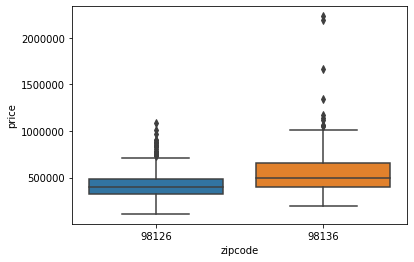

In [102]:
sns.boxplot(x= "zipcode", y= "price", data = c6)